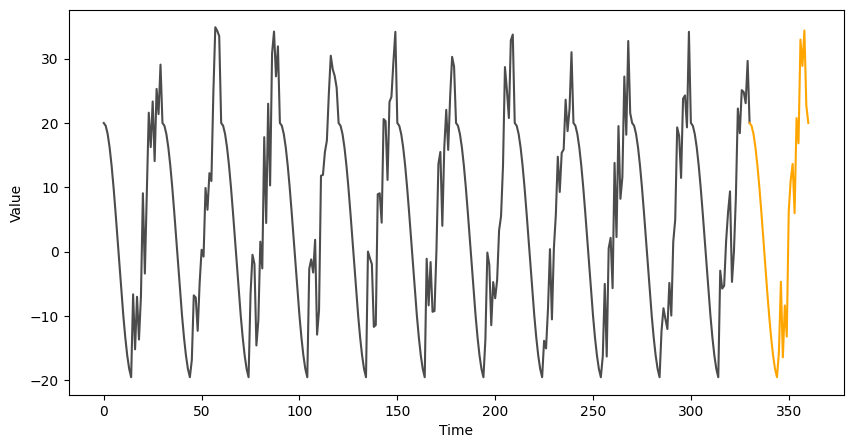

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5,
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(361))

plt.figure(figsize = (10, 5))
plt.xlabel("Time")
plt.ylabel("Value")

plt.plot(np.arange(0, 30 * 11 + 1),
         time_series[:30 * 11 + 1],
         color = 'black', alpha = 0.7)

plt.plot(np.arange(30 * 11, 30 * 12 + 1),
         time_series[30 * 11:],
         color = 'orange')

In [2]:
from functools import partial
def make_sequence(time_series, n):
  x_train, y_train = list(), list()

  for i in range(len(time_series)):
    x = time_series[i:(i + n)]
    if (i + n) < len(time_series):
      x_train.append(x)
      y_train.append(time_series[i + n])
    else:
      break
  return np.array(x_train), np.array(y_train)

n = 10
x_train, y_train = make_sequence(time_series,n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30*11:]
y_test = y_train[30*11:]

print('train:', patial_x_train.shape, patial_y_train.shape)
print('test:', x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


In [3]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 10)

for i in range(1, 4):
  print(a[i], '|', b[i])

[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13


In [4]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1)))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.fit(x_train, y_train, epochs = 100, batch_size=12)

Epoch 1/100
30/30 [==============================] - 7s 8ms/step - loss: 242.1483
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 207.0719
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 179.2319
Epoch 4/100
30/30 [==============================] - 0s 9ms/step - loss: 153.9948
Epoch 5/100
30/30 [==============================] - 0s 14ms/step - loss: 131.8391
Epoch 6/100
30/30 [==============================] - 0s 14ms/step - loss: 116.7416
Epoch 7/100
30/30 [==============================] - 0s 13ms/step - loss: 105.0878
Epoch 8/100
30/30 [==============================] - 0s 15ms/step - loss: 97.5568
Epoch 9/100
30/30 [==============================] - 0s 14ms/step - loss: 91.3354
Epoch 10/100
30/30 [==============================] - 0s 16ms/step - loss: 86.1546
Epoch 11/100
30/30 [==============================] - 0s 15ms/step - loss: 81.3782
Epoch 12/100
30/30 [==============================] - 0s 15ms/step - loss: 77.4008
Epoch 13/1

1/1 [==============================] - 0s 225ms/step


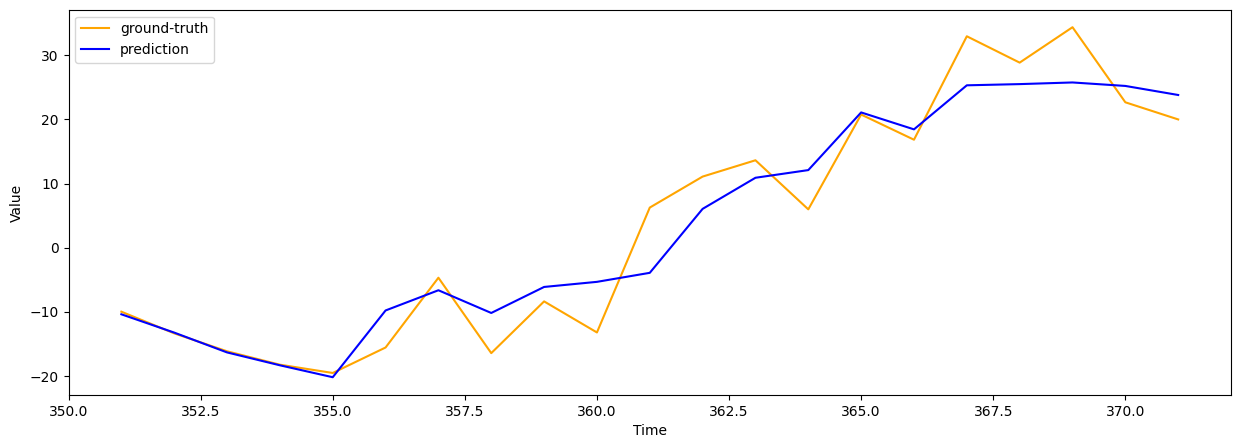

In [6]:
pred = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color = 'orange', label = 'ground-truth')#관측값
plt.plot(pred_range, pred.reshape(-1,), color = 'blue', label = 'prediction')#예측값
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train),(X_test, y_test) = imdb.load_data(num_words = num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32))
model.add(SimpleRNN(32, return_sequences=True, dropout= 0.15,
                    recurrent_dropout = 0.15))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

model.summary()

history = model.fit(pad_X_train, y_train, batch_size = 64, epochs = 1, validation_split = 0.20)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 324193 (1.24 MB)
Trainable params: 324193 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 [==============================] - 452s 1s/step - loss: 0.6990 - acc: 0.5143 - val_loss: 0.6859 - val_acc: 0.5400


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322080 (1.23 MB)
Trainable params: 322080 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
